In [1]:
import sys
# Add the src directory to the Python path
sys.path.insert(0, '../src')

In [2]:
from datetime import datetime

from botcoin.profilers.stock import StockProfiler
from botcoin.utils.stream_data import generate_price_stream
from botcoin.utils.visual.statistics import plot_kde_with_stats, plot_price_histogram_with_stats

In [3]:
symbol = "SPY"
profiler = StockProfiler()

In [4]:
profile = profiler.profile(symbol)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
profiler.print_profile(profile)

Current Price of SPY: 601.4
Annual Return of SPY: 14.87%
Sharpe Ratio of SPY: 0.893574
Sortino Ratio of SPY: 0.772424


In [6]:
returns_1min = profile["1min_returns"]
print(f"Profile for {symbol}:")
print(f"Number of 1-minute returns for {symbol}: {len(returns_1min)}")
print(f"Mean 1-minute returns for {symbol}: {returns_1min.mean():.6f}")
print(f"Standard deviation of 1-minute returns for {symbol}: {returns_1min.std():.6f}")
print(f"Max 1-minute return for {symbol}: {returns_1min.max():.6f}")
print(f"Min 1-minute return for {symbol}: {returns_1min.min():.6f}")

Profile for SPY:
Number of 1-minute returns for SPY: 7716
Mean 1-minute returns for SPY: 0.000005
Standard deviation of 1-minute returns for SPY: 0.000324
Max 1-minute return for SPY: 0.007358
Min 1-minute return for SPY: -0.002471


In [7]:
returns_1d = profile["1d_returns"]
print(f"Number of 1-day returns for {symbol}: {len(returns_1d)}")
print(f"Mean 1-day returns for {symbol}: {returns_1d.mean():.6f}")
print(f"Standard deviation of 1-day returns for {symbol}: {returns_1d.std():.6f}")
print(f"Max 1-day return for {symbol}: {returns_1d.max():.6f}")
print(f"Min 1-day return for {symbol}: {returns_1d.min():.6f}")

Number of 1-day returns for SPY: 1255
Mean 1-day returns for SPY: 0.000265
Standard deviation of 1-day returns for SPY: 0.009312
Max 1-day return for SPY: 0.111827
Min 1-day return for SPY: -0.048634


In [8]:
# Compute percentage of data within ±1 std
data = returns_1d
mean = data.mean()
std = data.std()
lower_bound = mean - std
upper_bound = mean + std
within_std = data[(data >= lower_bound) & (data <= upper_bound)]
percentage_within_std = len(within_std) / len(data) * 100

print(f"Percentage of 1-day returns within ±1 std for {symbol}: {percentage_within_std:.2f}%")

Percentage of 1-day returns within ±1 std for SPY: 76.81%


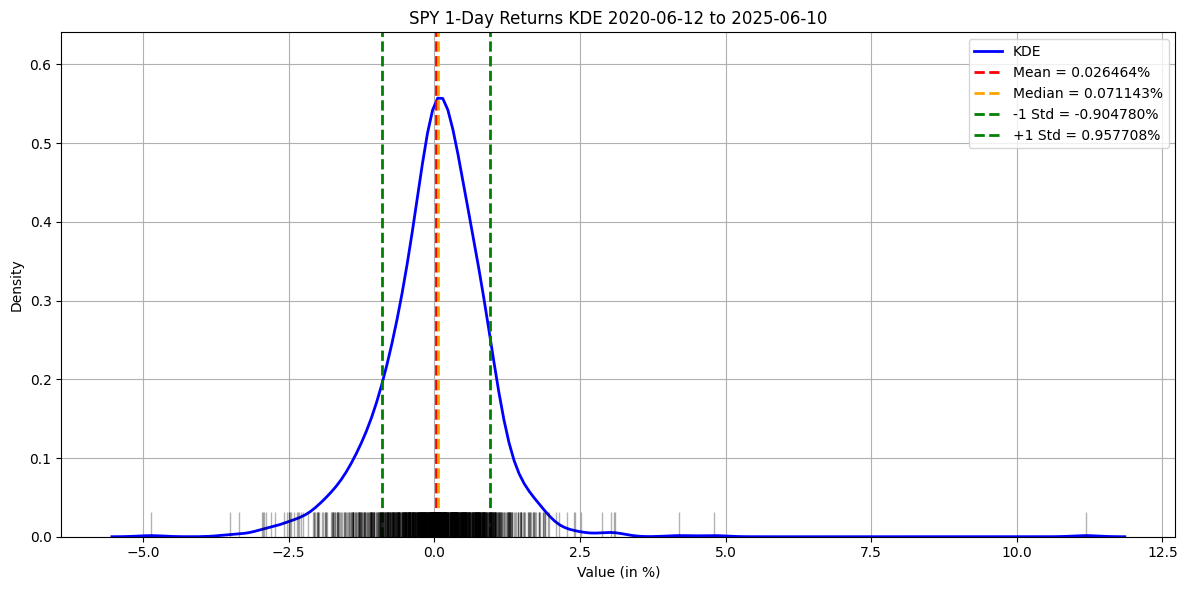

In [9]:
# Compute the date range of the 1-day returns
start_date = data.index.min().date()
end_date = data.index.max().date()

plot_kde_with_stats(returns_1d, title=f"{symbol} 1-Day Returns KDE {start_date} to {end_date}")


In [10]:
ohlcv = profile['ohlcv_1min']

prices = generate_price_stream(ohlcv, candle_duration='1min', avg_freq_per_minute=10)

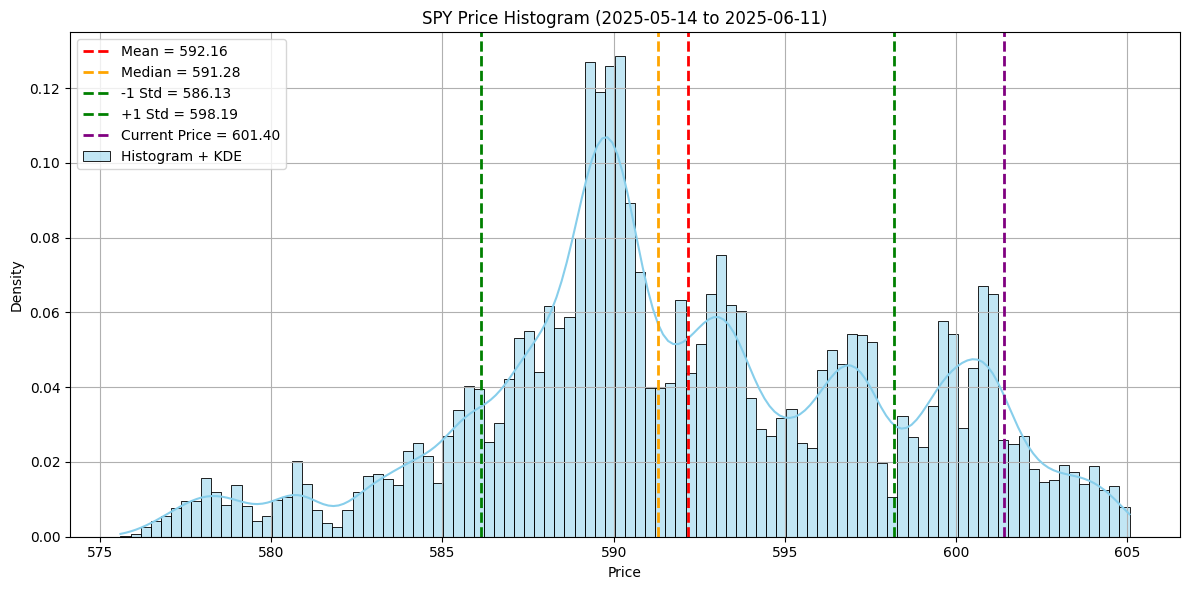

In [11]:
start_time = prices.index.min()
end_time = prices.index.max()

# convert Unix timestamps to datetime objects
start_date = datetime.fromtimestamp(start_time).date()
end_date = datetime.fromtimestamp(end_time).date()

current_price = profile['quote']

plot_price_histogram_with_stats(prices['price'], current_price=current_price, title=f"{symbol} Price Histogram ({start_date} to {end_date})", bins=100)